# Capstone Project - Week 1
## Function 1: 2D Optimization Challenge
### Initial Data Exploration and Analysis

**Date:** January 27, 2026

**Objective:** Maximize F1 using Bayesian Optimization

**Approach:** 
- Load and explore initial 2D samples
- Fit Gaussian Process surrogate model
- Use Expected Improvement for next point selection


## Section 1: Import Required Libraries

In [118]:
# Core scientific computing libraries
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Process regression and optimization
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
from scipy.stats import norm
from scipy.optimize import minimize

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f'Libraries loaded successfully for F1 (2D)')

Libraries loaded successfully for F1 (2D)


## Section 2: Load Initial Data

Loading Week 1 initial samples for Function 1

In [119]:
# Define file paths for F1
INPUT_FILE = 'f1_initial_inputs.npy'   # Shape: (n_samples, 2)
OUTPUT_FILE = 'f1_initial_outputs.npy' # Shape: (n_samples,)

In [120]:
# Load data
X = np.load(INPUT_FILE)  # Input matrix
Y = np.load(OUTPUT_FILE) # Output vector

# Display data information
print('F1 Data Loaded:')
print(f'  Input shape:  {X.shape}')
print(f'  Output shape: {Y.shape}')
print(f'  Dimensions:   {X.shape[1]}D')
print(f'  Samples:      {len(X)}')

F1 Data Loaded:
  Input shape:  (10, 2)
  Output shape: (10,)
  Dimensions:   2D
  Samples:      10


## Section 3: Exploratory Data Analysis

In [121]:
# Ensure proper data format
X = np.atleast_2d(X)
Y = Y.ravel()

print('='*70)
print('FUNCTION 1 - INITIAL DATA ANALYSIS')
print('='*70)

# Output statistics
print(f'\nOutput Statistics:')
print(f'  Maximum:  {Y.max():.6f}')
print(f'  Minimum:  {Y.min():.6f}')
print(f'  Mean:     {Y.mean():.6f}')
print(f'  Median:   {np.median(Y):.6f}')
print(f'  Std Dev:  {Y.std():.6f}')
print(f'  Range:    {Y.max() - Y.min():.6f}')

# Find best point
best_idx = np.argmax(Y)
best_value = Y[best_idx]
best_point = X[best_idx]

print(f'\n🎯 Best Point Found (Initial Sampling):')
print(f'  Value:    {best_value:.6f}')
print(f'  Location: {best_point}')

# Input space coverage
print(f'\nInput Space Coverage:')
for i in range(X.shape[1]):
    print(f'  X{i+1}: [{X[:, i].min():.4f}, {X[:, i].max():.4f}]')

FUNCTION 1 - INITIAL DATA ANALYSIS

Output Statistics:
  Maximum:  0.000000
  Minimum:  -0.003606
  Mean:     -0.000361
  Median:   0.000000
  Std Dev:  0.001082
  Range:    0.003606

🎯 Best Point Found (Initial Sampling):
  Value:    0.000000
  Location: [0.73102363 0.73299988]

Input Space Coverage:
  X1: [0.0825, 0.8839]
  X2: [0.0787, 0.8799]


In [122]:
##now print all the data
print("Input function 1 data: \n",np.load(INPUT_FILE))
print("Output function 1 data: \n",np.load(OUTPUT_FILE))

Input function 1 data: 
 [[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
Output function 1 data: 
 [ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


In [123]:
print(f"Loaded {X.shape[0]} points in {X.shape[1]}D" )
print(f"Current best : {Y.max():.6e} at {X[Y.argmax()]}")  # 
X = np.atleast_2d(X)  # Make sure X is aleays 2d
Y = Y.ravel() #  forces Y to be 1 d flat


Loaded 10 points in 2D
Current best : 7.710875e-16 at [0.73102363 0.73299988]


In [124]:
##Section 2: Fit surrogate for function 1

## Section 4: Gaussian Process Model

Fitting a GP surrogate model to learn the function landscape

In [125]:
kernel  = ConstantKernel(1.0,constant_value_bounds=(1e-10,1e10)) * RBF(length_scale=0.3,  length_scale_bounds=(0.01,10.0)) \
+ WhiteKernel(noise_level=1e-10, noise_level_bounds=(1e-12,1e-2))

In [126]:
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 30, normalize_y=False, random_state=42)

In [127]:
gp.fit(X,Y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.3) + WhiteKernel(noise_level=1e-10),
                         n_restarts_optimizer=30, random_state=42)

In [128]:
##Section 3  Define the acquision function

## Section 6: Visualization

Visualizing the optimization landscape and strategy

In [129]:
# create grid for plotting

In [130]:
x_plot = np.column_stack([np.linspace(X[:,0] .min(), X[:,0].max(), 1000), 
                         np.ones(1000)+X[:,1].mean()])

In [131]:
# Get GP Predictions 

In [132]:
mv, sigma = gp.predict(x_plot, return_std=True)

## Section 5: Acquisition Function Optimization

Using Expected Improvement to select next sampling point

In [133]:
# Calculate expected improvement

In [134]:
y_best = Y.max() # best observed value so far

In [135]:
# EI CALCULATION

In [136]:
with np.errstate(divide='warn'):
    improvement = mv - y_best
    Z = improvement / sigma
    EI = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    EI[sigma == 0.0] = 0.0

In [137]:
# FIND NEXT SAMPLING POINT 

In [138]:
x_next = x_plot[np.argmax(EI)]

In [139]:
print(f"Best current value :{y_best:.6f} at x{X[Y.argmax()][0]:.6f}")

Best current value :0.000000 at x0.731024


In [140]:
print(f"EI data gives next point to sample: x_next = {x_next[0]:.6f},{x_next[1]:.6f}")

EI data gives next point to sample: x_next = 0.082507,1.539519


In [141]:
#Now Plot

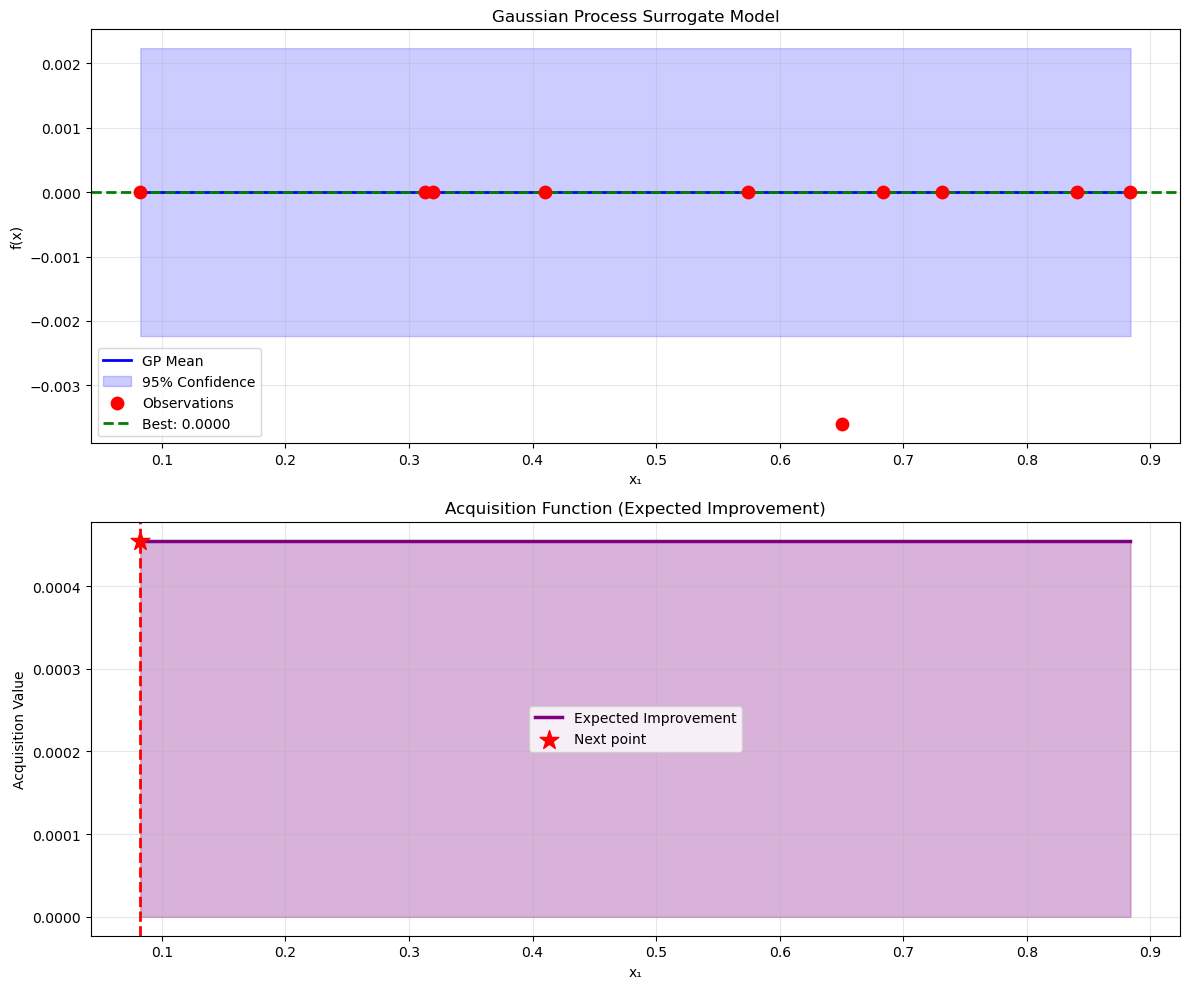

In [142]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10)) 
# Top plot: GP surrogate 
ax1.plot(x_plot[:, 0], mv, 'b-', label='GP Mean', linewidth=2) 
ax1.fill_between(x_plot[:, 0], mv - 1.96*sigma, mv + 1.96*sigma, alpha=0.2, color='blue', label='95% Confidence') 
ax1.scatter(X[:, 0], Y, c='red', s=80, zorder=10, label='Observations') 
ax1.axhline(y=y_best, color='green', linestyle='--', linewidth=2, label=f'Best: {y_best:.4f}') 
ax1.set_xlabel('x₁') 
ax1.set_ylabel('f(x)') 
ax1.set_title('Gaussian Process Surrogate Model') 
ax1.legend() 
ax1.grid(True, alpha=0.3) 
# Bottom plot: Acquisition function (EI)
ax2.plot(x_plot[:, 0], EI, 'purple', linewidth=2.5, label='Expected Improvement') 
ax2.axvline(x=x_next[0], color='red', linestyle='--', linewidth=2) 
ax2.scatter(x_next[0], np.max(EI), c='red', s=200, marker='*', zorder=10, label=f'Next point') 
ax2.fill_between(x_plot[:, 0], 0, EI, alpha=0.3, color='purple') 
ax2.set_xlabel('x₁') 
ax2.set_ylabel('Acquisition Value') 
ax2.set_title('Acquisition Function (Expected Improvement)') 
ax2.legend() 
ax2.grid(True, alpha=0.3) 
plt.tight_layout() 
plt.show()

In [143]:
##Now look for the UCB

In [144]:
# Upper Confidence Bound (UCB) Acquisition Function
kappa = 2.0  # Exploration parameter

# Generate prediction grid
x_plot_ucb = np.column_stack([np.linspace(X[:,0].min(), X[:,0].max(), 1000),
                               np.ones(1000) * X[:,1].mean()])

# Compute UCB values
mu_ucb, sigma_ucb = gp.predict(x_plot_ucb, return_std=True)
UCB = mu_ucb + kappa * sigma_ucb


In [145]:
##Find Next sampling point

In [146]:
x_next_idx = np.argmax(UCB)
x_next_ucb = x_plot_ucb[x_next_idx]
y_best_ucb = Y.max()

In [147]:
print(f"Best current value :{y_best_ucb:.6f} at x{X[Y.argmax()][0]:.6f}")
print(f"Next point to sample: x_next_ucb = {x_next_ucb[0]:.6f},{x_next_ucb[1]:.6f}")
print(f"Max UCB value:{np.max(UCB):.6F}")

Best current value :0.000000 at x0.731024
Next point to sample: x_next_ucb = 0.082507,0.539519
Max UCB value:0.002281


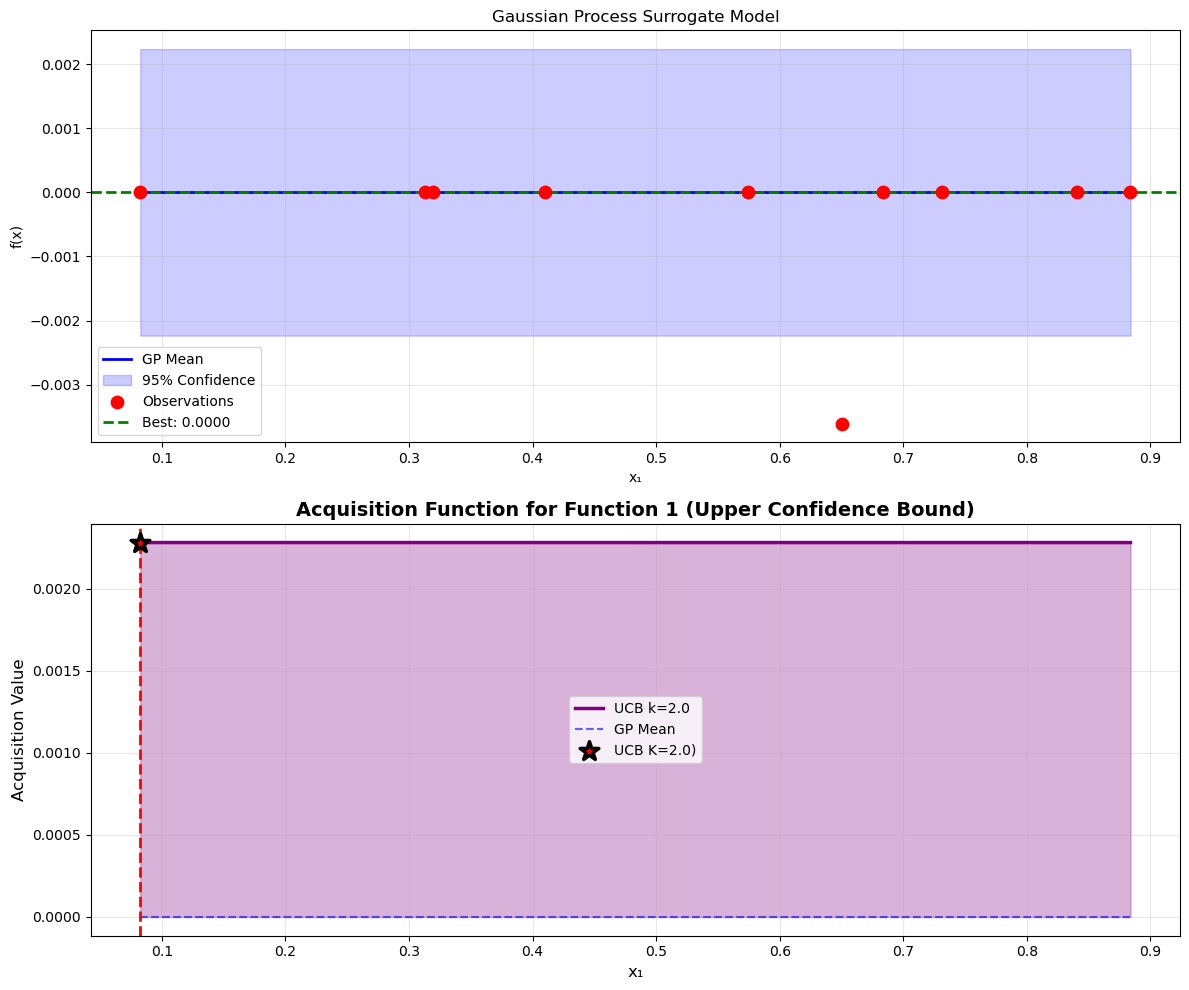

In [148]:
##Plot 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10)) 
# Top plot: GP surrogate 
ax1.plot(x_plot_ucb[:, 0], mv, 'b-', label='GP Mean', linewidth=2) 
ax1.fill_between(x_plot_ucb[:, 0], mv - 1.96*sigma, mv + 1.96*sigma, alpha=0.2, color='blue', label='95% Confidence') 
ax1.scatter(X[:, 0], Y, c='red', s=80, zorder=10, label='Observations') 
ax1.axhline(y=y_best_ucb, color='green', linestyle='--', linewidth=2, label=f'Best: {y_best_ucb:.4f}')  
ax1.set_xlabel('x₁') 
ax1.set_ylabel('f(x)') 
ax1.set_title('Gaussian Process Surrogate Model') 
ax1.legend() 
ax1.grid(True, alpha=0.3) 

# Bottom plot: Acquisition function (UCB)
ax2.plot(x_plot_ucb[:, 0], UCB, 'purple', linewidth=2.5, label=f'UCB k={kappa}') 
ax2.plot(x_plot_ucb[:, 0], mv, 'b--', linewidth=1.5,alpha=0.6,label= 'GP Mean') 
##ax2.axvline(x=x_next[0], color='red', linestyle='--', linewidth=2,lable =f'x_next ={x_next[0]:.4f}') 
ax2.axvline(x=x_next_ucb[0], color='red', linestyle='--', linewidth=2) 
ax2.scatter(x_next_ucb[0], np.max(UCB), c='red', s=200, marker='*', zorder=10, edgecolors='black' , linewidth=2.5,label=f'UCB K={kappa})') 
ax2.fill_between(x_plot_ucb[:, 0], 0, UCB, alpha=0.3, color='purple')
ax2.set_xlabel('x₁',fontsize=12) 
ax2.set_ylabel('Acquisition Value',fontsize=12) 
ax2.set_title('Acquisition Function for Function 1 (Upper Confidence Bound)',fontsize=14,fontweight = 'bold') 
ax2.legend(loc='best') 
ax2.grid(True, alpha=0.3) 
plt.tight_layout() 
plt.show()


In [149]:
# Format the next query point according to assignment requirements 
# Each xi must begin with 0 and have 6 decimal places 
# Extract the coordinates 
x1_next_ucb = x_next_ucb[0] 
x2_next_ucb = x_next_ucb[1] 

In [150]:
# Format to 6 decimal places, ensuring they start with 0 
query_string_ucb = f"0.{str(x1_next_ucb).split('.')[1][:6]}-0.{str(x2_next_ucb).split('.')[1][:6]}"


In [151]:
# Now print the next best sampling points for UCB and EI

In [152]:
print("\n" + "="*60) 
print("QUERY SUBMISSION") 
print("="*60) 
print(f"UCB data gives next point to sample for Function 1: x_next_ucb = {x_next_ucb[0]:.6f}, {x_next_ucb[1]:.6f}") 
print(f"EI  data gives next point to sample for Function 1: x_next = {x_next[0]:.6f}, {x_next[1]:.6f}")
print("="*60)


QUERY SUBMISSION
UCB data gives next point to sample for Function 1: x_next_ucb = 0.082507, 0.539519
EI  data gives next point to sample for Function 1: x_next = 0.082507, 1.539519


In [153]:
 # generate random data points
from scipy.stats import norm

def expected_improvement(X_new,gp,y_best,xi=0.01):
     mv,sigma= gp.predict(X_new,return_std=True)
     sigma = np.maximum(sigma,1e-10)
     imp = mv-y_best -xi
     Z = imp/sigma
     ei = imp*norm.cdf(Z)+sigma * norm.pdf(Z)
     ei[sigma < 1e-10] =0.0
     return ei

kernel  = ConstantKernel(1.0,constant_value_bounds=(1e-10,1e10)) * RBF(length_scale=0.3,  length_scale_bounds=(0.01,10.0)) \
+ WhiteKernel(noise_level=1e-10, noise_level_bounds=(1e-12,1e-2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 30, normalize_y=False, random_state=42)
gp.fit(X,Y)
n_candidates = 5000
candidates = np.random.uniform(0,1,size=(n_candidates,2))

#compute acquision curve on candidates

acquisition_type = "UCB"
#acquisition_type = "EI"

best_idx= None

if acquisition_type == "EI":
    y_best = Y.max()
    ei_values = expected_improvement(candidates,gp,y_best=y_best,xi=0.01)
    best_idx=np.argmax(ei_values)
    print("Using Expected Improvement (EI)")
elif  acquisition_type == "UCB":
      mv,sigma=gp.predict(candidates,return_std=True)
      ucb_values = mv+2.0*sigma
      best_idx = np.argmax(ucb_values)
      print("Using Upper Confidence Bounds (UCB)")
else:
    raise ValueError("Invalid acquision type")
if acquisition_type == "UCB":
    x_next = candidates[best_idx]
    x_next = np.clip(x_next,0.0,1.0)
    
print("Random data: Next point from random candidates:",x_next)
print("Random Data: GP fitted. Learned kernal :",gp.kernel_)

Using Upper Confidence Bounds (UCB)
Random data: Next point from random candidates: [0.76066473 0.80980126]
Random Data: GP fitted. Learned kernal : 0.00114**2 * RBF(length_scale=0.0137) + WhiteKernel(noise_level=1.79e-09)
